# Support Vector Machines (SVM)

## What is SVM :
    “Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for 
    both classification or regression challenges. However,  it is mostly used in classification problems.
    In the SVM algorithm, we plot each data item as a point in n-dimensional space 
    (where n is a number of features you have) with the value of each 
    feature being the value of a particular coordinate. Then, we perform classification
    by finding the hyper-plane that differentiates the two classes very well 
    Support Vectors are simply the coordinates of individual observation.
    The SVM classifier is a frontier that best segregates the two classes (hyper-plane/ line).



![Support-Vector-Machine](https://user-images.githubusercontent.com/73169639/206293656-6998e3fd-e406-459d-a823-435a816f54da.png)


## Iters Formulas

# $$w = w + \alpha * (2*\lambda * w) _{y_{i}(wx_{i}+b)>=1}$$
# $$w = w + \alpha * (2*\lambda * w- X_{i}.Y_{i}) _{y_{i}(wx_{i}+b)<1}$$
# $$b = b +( \alpha * y_i)  _{y_{i}(wx_{i}+b)<1}$$

## Used Libraries

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

## Implement SVM Class

In [68]:
class SVM:
    
    def __init__(self,learning_rate=0.001,lambda_param=0.01,n_iters=1000):
        self.lr=learning_rate
        self.lambda_param =lambda_param
        self.n_iters=n_iters
        self.w= None
        self.b=None
    def fit(self,X,y):
        n_samples,n_features=X.shape
        y_=np.where(y<=0,-1,1)
        #init weights
        self.w=np.zeros(n_features)
        self.b=0
        #Learning Iters
        for _ in range(self.n_iters):
            for idx,x_i in enumerate(X):
                condition=y_[idx]*(np.dot(x_i,self.w)-self.b)>=1
                if condition:
                    self.w-=self.lr*(2*self.lambda_param*self.w)
                else:
                    self.w-=self.lr*(2*self.lambda_param*self.w-np.dot(x_i,y_[idx]))
                    self.b-=self.lr*y_[idx]
            
    def predict(self,X):
        approx=np.dot(X,self.w)-self.b
        return np.sign(approx)

## implement a visualizing function

In [69]:
def visualize_svm():
    def get_hyperplane_value(x,w,b,offset):
        return(-w[0]*x+b+offset)/w[1]
    fig =plt.figure()
    ax=fig.add_subplot(1,1,1)
    # Scatter dataset points
    plt.scatter(X[:,0],X[:,1],marker="o",c=y)
    
    x0_1=np.amin(X[:,0])
    x0_2=np.amax(X[:,0])
     
    #get all hyper planes x's
    x1_1 =get_hyperplane_value(x0_1,clf.w,clf.b,0)
    x1_2 =get_hyperplane_value(x0_2,clf.w,clf.b,0)
    x1_1_m =get_hyperplane_value(x0_1,clf.w,clf.b,-1)
    x1_2_m =get_hyperplane_value(x0_2,clf.w,clf.b,-1)
    x1_1_p =get_hyperplane_value(x0_1,clf.w,clf.b,1)
    x1_2_p =get_hyperplane_value(x0_2,clf.w,clf.b,1)
    
    #plotting
    ax.plot([x0_1,x0_2],[x1_1,x1_2],"y--")
    ax.plot([x0_1,x0_2],[x1_1_m,x1_2_m],"k")
    ax.plot([x0_1,x0_2],[x1_1_p,x1_2_p],"k")
    

## Generate Random dataset

In [70]:
X,y=datasets.make_blobs(
n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
y=np.where(y==0,-1,1)
X_train,X_test,y_train,y_test=train_test_split(
X,y,test_size=0.3,random_state=123)

## Train The dataset

In [71]:
clf=SVM()
clf.fit(X_train,y_train)

## Predict the testset values

In [72]:
predictions=clf.predict(X_test)

## Calc Accu

In [73]:
def accua(y_true,y_pred):
    return np.sum(y_true==y_pred)/len(y_true)
print("acuu :" ,accua(y_test,predictions))

acuu : 1.0


## Visualize the decision boundry

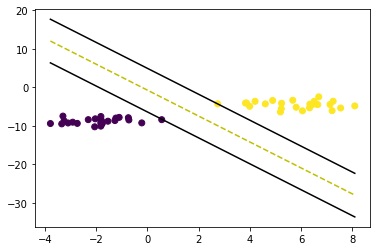

In [74]:
visualize_svm()